In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'\W+', ' ', text)  # remove non-word characters
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df = pd.read_csv("comment.csv")
df['cleaned_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\Ab
[nltk_data]     Deshmukh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ab
[nltk_data]     Deshmukh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize text
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_text'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display top words in topics
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}: ", [feature_names[i] for i in topic.argsort()[-no_top_words:]])

display_topics(lda, vectorizer.get_feature_names_out(), 15)


Topic 0:  ['day', 'understand', 'life', 'think', 'happened', 'maybe', 'world', 'people', 'data', 'human', 'time', 'earth', 'planet', 'climate', 'change']
Topic 1:  ['gas', 'warming', 'scientist', 'cold', 'denier', 'know', 'thank', 'global', 'going', 'heat', 'science', 'nasa', 'change', 'co2', 'climate']
Topic 2:  ['excellent', 'thanks', 'radiation', 'plastic', 'better', 'change', 'way', 'know', 'temperature', 'point', 'post', 'people', 'sun', 'earth', 'nasa']
Topic 3:  ['ton', 'earth', 'co2', 'foot', 'temperature', 'rise', 'warming', 'atmosphere', 'sea', 'dioxide', 'global', 'water', 'level', 'carbon', 'year']
Topic 4:  ['colder', 'air', 'tree', '100', 'time', 'getting', 'rain', 'like', 'que', 'warming', 'global', 'people', 'age', 'ice', 'year']


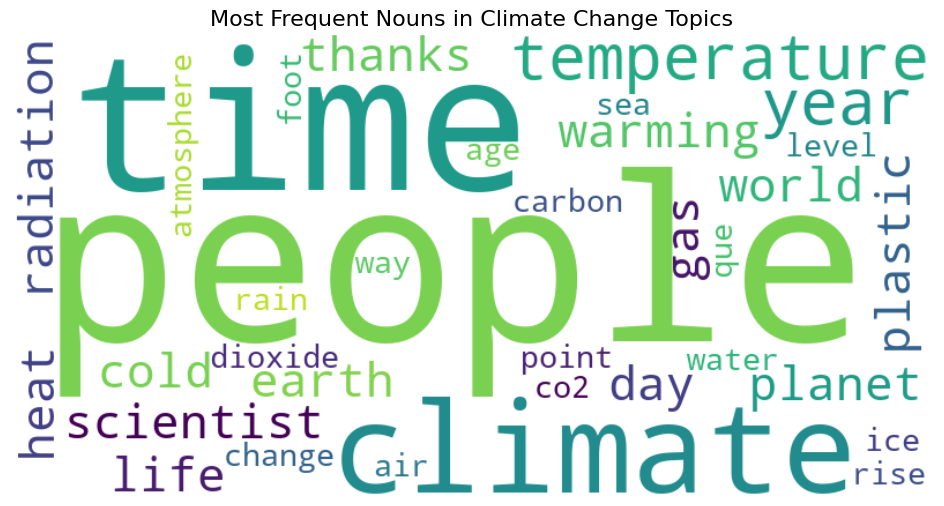

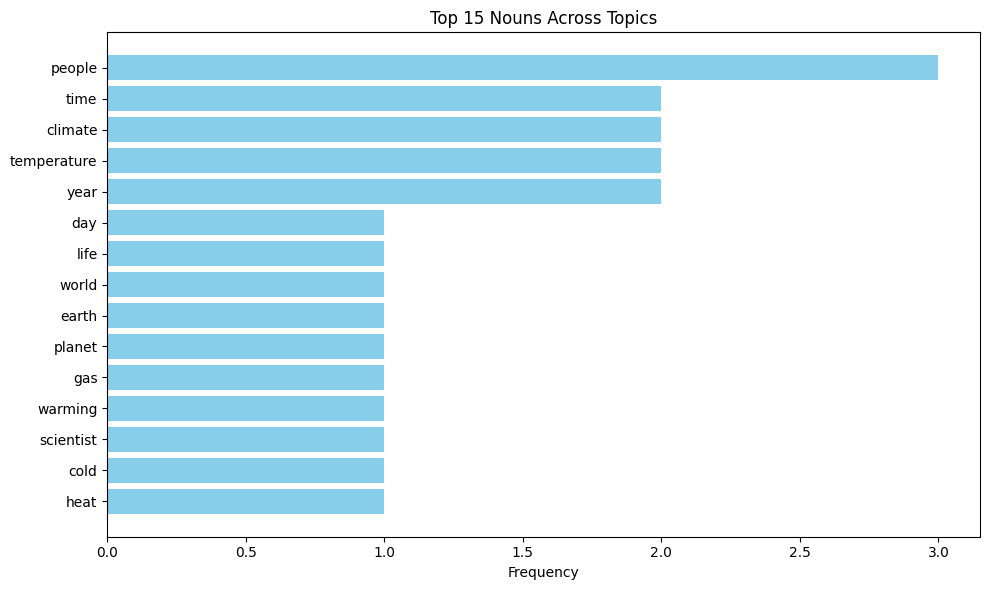

In [15]:
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Topics provided
topics = [
    ['day', 'understand', 'life', 'think', 'happened', 'maybe', 'world', 'people', 'data', 'human', 'time', 'earth', 'planet', 'climate', 'change'],
    ['gas', 'warming', 'scientist', 'cold', 'denier', 'know', 'thank', 'global', 'going', 'heat', 'science', 'nasa', 'change', 'co2', 'climate'],
    ['excellent', 'thanks', 'radiation', 'plastic', 'better', 'change', 'way', 'know', 'temperature', 'point', 'post', 'people', 'sun', 'earth', 'nasa'],
    ['ton', 'earth', 'co2', 'foot', 'temperature', 'rise', 'warming', 'atmosphere', 'sea', 'dioxide', 'global', 'water', 'level', 'carbon', 'year'],
    ['colder', 'air', 'tree', '100', 'time', 'getting', 'rain', 'like', 'que', 'warming', 'global', 'people', 'age', 'ice', 'year']
]

# Flatten all words
all_words = [word for topic in topics for word in topic]

# POS tagging using spaCy, keep only nouns
doc = nlp(" ".join(all_words))
nouns = [token.text.lower() for token in doc if token.pos_ == 'NOUN']

# Count noun frequencies
noun_freq = Counter(nouns)

# ---- WORD CLOUD ----
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(noun_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Nouns in Climate Change Topics", fontsize=16)
plt.show()

# ---- BAR CHART ----
top_n = 15
top_nouns = noun_freq.most_common(top_n)

words, freqs = zip(*top_nouns)
plt.figure(figsize=(10, 6))
plt.barh(words[::-1], freqs[::-1], color='skyblue')
plt.xlabel("Frequency")
plt.title(f"Top {top_n} Nouns Across Topics")
plt.tight_layout()
plt.show()


In [ ]:
'''from here we got important factors which are related to global warming & climate change, discussed within public, shown in Frequency chart and Word Cloud
1.Temprature
2.Gases in Atmosphere (related to Climate change like Carbon dioxide)
3.Sea level
4.Radiation
5.Air Quality 
6. Ice'''